In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv('data/tv-cast.csv')

In [23]:
df.head()

,Performer,Show,Show Start,Show End,Status?,CharEnd,Years Since,#LEAD,#SUPPORT,#Shows,Score,Score/Y,lead_notes,support_notes,show_notes
0,Steven Hill,Law & Order,1990,2010,END,2000,15,0,0,0,0.00,0,NaN,NaN,NaN
1,Kelli Williams,The Practice,1997,2014,END,2003,12,0,1,6,6.25,0.520833333,NaN,Any Day Now (2012),"Medical Investigation, Season 1; Lie To Me, Se..."
2,LisaGay Hamilton,The Practice,1997,2014,END,2003,12,2,0,2,4.00,0.333333333,"Life of a King, 2014; Go For Sisters, 2013",NaN,"Men of a Certain Age, Season 1-2"
3,Lara Flynn Boyle,The Practice,1997,2014,END,2003,12,0,0,0,0.00,0,NaN,NaN,NaN
4,Dylan McDermott,The Practice,1997,2014,END,2004,11,2,7,6,9.75,0.886363636,"Olympus Has Fallen, 2013; Freezer, 2014","The Messengers, 2007; Unbeatable Harold, 2009;...","Big Shots, Season 1; Dark Blue, Season 1-2; Am..."


In [24]:
df.shape

(248, 15)

#### Handle any null values

In [25]:
df.isnull().sum()

Performer          0
Show               0
Show Start         0
Show End           0
Status?            0
CharEnd            0
Years Since        0
#LEAD              0
#SUPPORT           0
#Shows             0
Score              0
Score/Y            0
lead_notes       159
support_notes    113
show_notes       110
dtype: int64

In [26]:
df.drop(columns = ['lead_notes', 'support_notes', 'show_notes'], inplace=True)

In [27]:
df.isnull().sum()

Performer      0
Show           0
Show Start     0
Show End       0
Status?        0
CharEnd        0
Years Since    0
#LEAD          0
#SUPPORT       0
#Shows         0
Score          0
Score/Y        0
dtype: int64

#### Change the wonky columns names:

In [30]:
df.columns = df.columns.str.lower().str.replace('/', '_').str.replace('?', '').str.replace('#', '').str.replace(' ', '_')

In [31]:
df.columns

Index(['performer', 'show', 'show_start', 'show_end', 'status', 'charend',
       'years_since', 'lead', 'support', 'shows', 'score', 'score_y'],
      dtype='object')

#### Let's take a look at the 'status' column

In [36]:
df.status.value_counts()

END     202
LEFT     29
End      17
Name: status, dtype: int64

#### Write a lambda function to change the 'End/END' classes to 0 and the 'LEFT' class to 1

In [39]:
df['status'] = df['status'].map(lambda x: 0 if x == 'LEFT' else 1)

In [40]:
df['status'].value_counts()

1    219
0     29
Name: status, dtype: int64

#### Create a visualization for the 'status' column

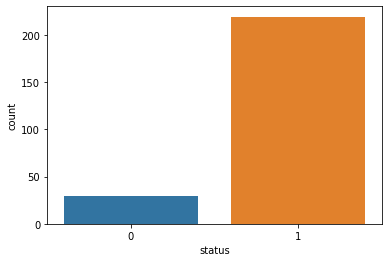

In [41]:
sns.countplot(df['status'], label = 'count')

In [49]:
df['show'].value_counts()

Deadwood                           24
Boardwalk Empire                   19
Big Love                           17
Friday Night Lights                16
True Blood                         15
Lost                               13
The Sopranos                       13
True Detective                     12
Heroes                             12
The West Wing                      11
ER                                 10
Dexter                              9
Joan of Arcadia                     9
Six Feet Under                      8
House                               8
Breaking Bad                        8
The Practice                        8
Boston Legal                        6
Game of Thrones                     5
Homeland                            5
Damages                             4
Law & Order                         4
24                                  3
Downton Abbey                       2
CSI: Crime Scene Investigations     2
Grey's Anatomy                      2
House of Car

In [53]:
def change(x):
    if x == 'True Detective -10' or x == 'True Detective -29':
        return 'True Detective'
    else:
        return x

In [54]:
df['show'] = df['show'].apply(change)

In [55]:
df['show'].value_counts()

Deadwood                           24
Boardwalk Empire                   19
Big Love                           17
Friday Night Lights                16
True Blood                         15
True Detective                     14
Lost                               13
The Sopranos                       13
Heroes                             12
The West Wing                      11
ER                                 10
Dexter                              9
Joan of Arcadia                     9
House                               8
Breaking Bad                        8
Six Feet Under                      8
The Practice                        8
Boston Legal                        6
Homeland                            5
Game of Thrones                     5
Damages                             4
Law & Order                         4
24                                  3
Downton Abbey                       2
CSI: Crime Scene Investigations     2
Grey's Anatomy                      2
House of Car

#### Let's review hot to make dummies for the 'show' column

In [56]:
shows = pd.get_dummies(df['show'])

In [58]:
shows.head()  #so now this is it's own dataframe

,24,Big Love,Boardwalk Empire,Boston Legal,Breaking Bad,CSI: Crime Scene Investigations,Damages,Deadwood,Dexter,Downton Abbey,...,House of Cards,Joan of Arcadia,Law & Order,Lost,Six Feet Under,The Practice,The Sopranos,The West Wing,True Blood,True Detective
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Join/Merge/Concat

In [59]:
joined = df.join(shows)

In [60]:
joined.head()

,performer,show,show_start,show_end,status,charend,years_since,lead,support,shows,...,House of Cards,Joan of Arcadia,Law & Order,Lost,Six Feet Under,The Practice,The Sopranos,The West Wing,True Blood,True Detective
0,Steven Hill,Law & Order,1990,2010,1,2000,15,0,0,None,...,0,0,1,0,0,0,0,0,0,0
1,Kelli Williams,The Practice,1997,2014,1,2003,12,0,1,None,...,0,0,0,0,0,1,0,0,0,0
2,LisaGay Hamilton,The Practice,1997,2014,1,2003,12,2,0,None,...,0,0,0,0,0,1,0,0,0,0
3,Lara Flynn Boyle,The Practice,1997,2014,1,2003,12,0,0,None,...,0,0,0,0,0,1,0,0,0,0
4,Dylan McDermott,The Practice,1997,2014,1,2004,11,2,7,None,...,0,0,0,0,0,1,0,0,0,0


In [61]:
merged = df.merge(shows, left_index = True, right_index = True)

In [62]:
merged.head()

,performer,show,show_start,show_end,status,charend,years_since,lead,support,shows,...,House of Cards,Joan of Arcadia,Law & Order,Lost,Six Feet Under,The Practice,The Sopranos,The West Wing,True Blood,True Detective
0,Steven Hill,Law & Order,1990,2010,1,2000,15,0,0,None,...,0,0,1,0,0,0,0,0,0,0
1,Kelli Williams,The Practice,1997,2014,1,2003,12,0,1,None,...,0,0,0,0,0,1,0,0,0,0
2,LisaGay Hamilton,The Practice,1997,2014,1,2003,12,2,0,None,...,0,0,0,0,0,1,0,0,0,0
3,Lara Flynn Boyle,The Practice,1997,2014,1,2003,12,0,0,None,...,0,0,0,0,0,1,0,0,0,0
4,Dylan McDermott,The Practice,1997,2014,1,2004,11,2,7,None,...,0,0,0,0,0,1,0,0,0,0


In [64]:
concat = pd.concat([df, shows], axis = 1)

In [66]:
concat.head()

,performer,show,show_start,show_end,status,charend,years_since,lead,support,shows,...,House of Cards,Joan of Arcadia,Law & Order,Lost,Six Feet Under,The Practice,The Sopranos,The West Wing,True Blood,True Detective
0,Steven Hill,Law & Order,1990,2010,1,2000,15,0,0,None,...,0,0,1,0,0,0,0,0,0,0
1,Kelli Williams,The Practice,1997,2014,1,2003,12,0,1,None,...,0,0,0,0,0,1,0,0,0,0
2,LisaGay Hamilton,The Practice,1997,2014,1,2003,12,2,0,None,...,0,0,0,0,0,1,0,0,0,0
3,Lara Flynn Boyle,The Practice,1997,2014,1,2003,12,0,0,None,...,0,0,0,0,0,1,0,0,0,0
4,Dylan McDermott,The Practice,1997,2014,1,2004,11,2,7,None,...,0,0,0,0,0,1,0,0,0,0


#### Heat map isolating one column

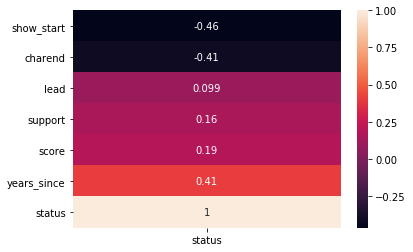

In [74]:
sns.heatmap(df.corr()[['status']].sort_values('status'), annot = True)